# FAA Project - predict Heart Attack

## Load in packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_column', None)
%matplotlib inline 


import warnings
warnings.filterwarnings('ignore')

## Load in dataset

In [2]:
df = pd.read_csv('2019_data.csv', index_col=0)
df.head()

,ENROLID,DOBYR,YEAR,AGE,PDX,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX,NDCNUM,PRODNME
1604,132687801.0,1958.0,2019.0,61.0,I132,I132,I214,I5033,J9601,Z6841,N185,L97421,L97529,J810,I5023,E1122,I5021,E11621,I2510,E872,1.0,169750111.0,NOVOLOG
1605,132687801.0,1958.0,2019.0,61.0,I130,I130,E872,I160,I5033,N184,I161,I5023,E1165,D631,E1122,N185,I10,NaN,NaN,NaN,1.0,169750111.0,NOVOLOG
1607,133117002.0,1963.0,2019.0,56.0,J9601,J9601,E875,I132,I5032,N186,I444,R079,R918,E1122,R739,E1165,D631,E876,E8339,E8779,2.0,169750111.0,NOVOLOG
1608,133117002.0,1963.0,2019.0,56.0,A419,A419,A0472,I132,I21A1,N186,I240,R079,R1084,R109,R112,I5032,R1011,Z136,E0842,E782,2.0,169750111.0,NOVOLOG
1609,133276802.0,1959.0,2019.0,59.0,K5732,K5732,I255,I5022,I69354,J449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,169750111.0,NOVOLOG


In [3]:
df.head()

,ENROLID,DOBYR,YEAR,AGE,PDX,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX,NDCNUM,PRODNME
1604,132687801.0,1958.0,2019.0,61.0,I132,I132,I214,I5033,J9601,Z6841,N185,L97421,L97529,J810,I5023,E1122,I5021,E11621,I2510,E872,1.0,169750111.0,NOVOLOG
1605,132687801.0,1958.0,2019.0,61.0,I130,I130,E872,I160,I5033,N184,I161,I5023,E1165,D631,E1122,N185,I10,NaN,NaN,NaN,1.0,169750111.0,NOVOLOG
1607,133117002.0,1963.0,2019.0,56.0,J9601,J9601,E875,I132,I5032,N186,I444,R079,R918,E1122,R739,E1165,D631,E876,E8339,E8779,2.0,169750111.0,NOVOLOG
1608,133117002.0,1963.0,2019.0,56.0,A419,A419,A0472,I132,I21A1,N186,I240,R079,R1084,R109,R112,I5032,R1011,Z136,E0842,E782,2.0,169750111.0,NOVOLOG
1609,133276802.0,1959.0,2019.0,59.0,K5732,K5732,I255,I5022,I69354,J449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,169750111.0,NOVOLOG


In [4]:
df.shape

(120934, 23)

#### Unique values

In [5]:
df.nunique()

ENROLID    3873
DOBYR        60
YEAR          1
AGE          58
PDX         962
DX1         962
DX2         668
DX3         706
DX4         798
DX5         899
DX6         970
DX7        1027
DX8        1071
DX9        1075
DX10       1022
DX11        973
DX12        990
DX13        979
DX14        946
DX15        937
SEX           2
NDCNUM     8652
PRODNME    1466
dtype: int64

#### Data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120934 entries, 1604 to 4924540
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ENROLID  120934 non-null  float64
 1   DOBYR    120934 non-null  float64
 2   YEAR     120934 non-null  float64
 3   AGE      120934 non-null  float64
 4   PDX      120934 non-null  object 
 5   DX1      120934 non-null  object 
 6   DX2      120934 non-null  object 
 7   DX3      120861 non-null  object 
 8   DX4      120789 non-null  object 
 9   DX5      120726 non-null  object 
 10  DX6      120093 non-null  object 
 11  DX7      119278 non-null  object 
 12  DX8      117700 non-null  object 
 13  DX9      115367 non-null  object 
 14  DX10     111737 non-null  object 
 15  DX11     107046 non-null  object 
 16  DX12     102913 non-null  object 
 17  DX13     97486 non-null   object 
 18  DX14     90229 non-null   object 
 19  DX15     82823 non-null   object 
 20  SEX      120934 non-nu

#### Convert float to integer, it runs faster

In [7]:
df[['ENROLID', 'DOBYR', 'YEAR', 'AGE', 'SEX', 'NDCNUM']] = df[['ENROLID', 'DOBYR', 'YEAR', 'AGE', 'SEX', 'NDCNUM']].astype(int)

In [8]:
df.head()

,ENROLID,DOBYR,YEAR,AGE,PDX,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX,NDCNUM,PRODNME
1604,132687801,1958,2019,61,I132,I132,I214,I5033,J9601,Z6841,N185,L97421,L97529,J810,I5023,E1122,I5021,E11621,I2510,E872,1,169750111,NOVOLOG
1605,132687801,1958,2019,61,I130,I130,E872,I160,I5033,N184,I161,I5023,E1165,D631,E1122,N185,I10,NaN,NaN,NaN,1,169750111,NOVOLOG
1607,133117002,1963,2019,56,J9601,J9601,E875,I132,I5032,N186,I444,R079,R918,E1122,R739,E1165,D631,E876,E8339,E8779,2,169750111,NOVOLOG
1608,133117002,1963,2019,56,A419,A419,A0472,I132,I21A1,N186,I240,R079,R1084,R109,R112,I5032,R1011,Z136,E0842,E782,2,169750111,NOVOLOG
1609,133276802,1959,2019,59,K5732,K5732,I255,I5022,I69354,J449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,169750111,NOVOLOG


## Exploratory Data Analysis

### Number of different diagnosis a patient had in 2018

In [9]:
df['ENROLID'].value_counts().head()

635620701     564
1227108202    525
519058803     462
1230674901    448
875369301     413
Name: ENROLID, dtype: int64

### Top 10 patient who had most diagnosis in 2019

In [10]:
df['ENROLID'].value_counts().to_frame().head(10)

,ENROLID
635620701,564
1227108202,525
519058803,462
1230674901,448
875369301,413
1350232101,392
159871402,384
623438402,370
145155202,364
720771002,350


### Top 10 most used drugs in 2019

In [11]:
df['PRODNME'].value_counts().to_frame().head(10)

,PRODNME
ATORVASTATIN CALCIUM,4103
CARVEDILOL,3642
FUROSEMIDE,3001
POTASSIUM CHLORIDE,2737
LISINOPRIL,2562
METOPROLOL SUCCINATE,2396
SPIRONOLACTONE,2145
HYDROCODONE BITARTRATE-ACETAMINOPHEN,2046
LOSARTAN POTASSIUM,2020
AMLODIPINE BESYLATE,1931


### Medication that each patient took in 2019

In [12]:
df.groupby('ENROLID')['PRODNME'].value_counts().to_frame().head(20)

PRODNME
ENROLID   PRODNME                                      
131856402 POTASSIUM CHLORIDE                          4
          CARVEDILOL                                  3
          FUROSEMIDE                                  3
          PRAVASTATIN SODIUM                          2
          CLOPIDOGREL                                 1
          ENTRESTO                                    1
          FINASTERIDE                                 1
          HYDROCODONE BITARTRATE-ACETAMINOPHEN        1
          ISOSORBIDE DINITRATE                        1
          SUPREP BOWEL PREP KIT                       1
          TAMSULOSIN HCL                              1
          TEMAZEPAM                                   1
          TRAZODONE HYDROCHLORIDE                     1
          XARELTO                                     1
131946001 AMPHETAMINE SALT COMBO                      4
          DOXYCYCLINE HYCLATE                         4
          OXYCODONE HCL                               4
          ALPRAZOLAM                                  2
          AMOXICILLIN/CLAVULANATE POTASSIUM           2
          ARIPIPRAZOLE                                2

### Missing values

In [13]:
df.isnull().sum()

ENROLID        0
DOBYR          0
YEAR           0
AGE            0
PDX            0
DX1            0
DX2            0
DX3           73
DX4          145
DX5          208
DX6          841
DX7         1656
DX8         3234
DX9         5567
DX10        9197
DX11       13888
DX12       18021
DX13       23448
DX14       30705
DX15       38111
SEX            0
NDCNUM         0
PRODNME        0
dtype: int64

#### Visualize the null value

<AxesSubplot:>

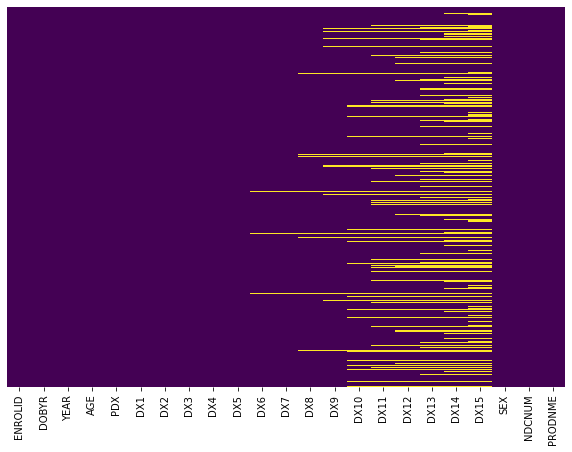

In [14]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap='viridis')

#### fill null value with 999

In [15]:
df = df.fillna('999')

### Visualize the null value again

<AxesSubplot:>

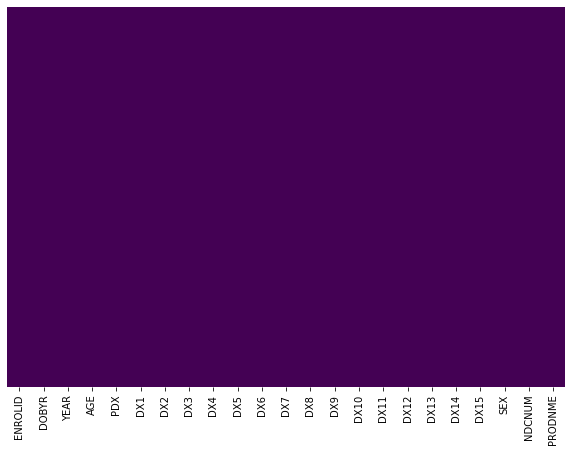

In [16]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap='viridis')

### Plots

#### Countplot of diagnosis codes relate to heart disease

In [17]:
dx1 = df.loc[df['DX1'].str.startswith('I')]
dx1['DX1'].value_counts()

I130      11385
I110      11052
I214       4434
I132       2387
I480       2192
          ...  
I314          4
I608          4
I2781         3
I452          2
I63032        1
Name: DX1, Length: 200, dtype: int64

#### DX1 heart disease code

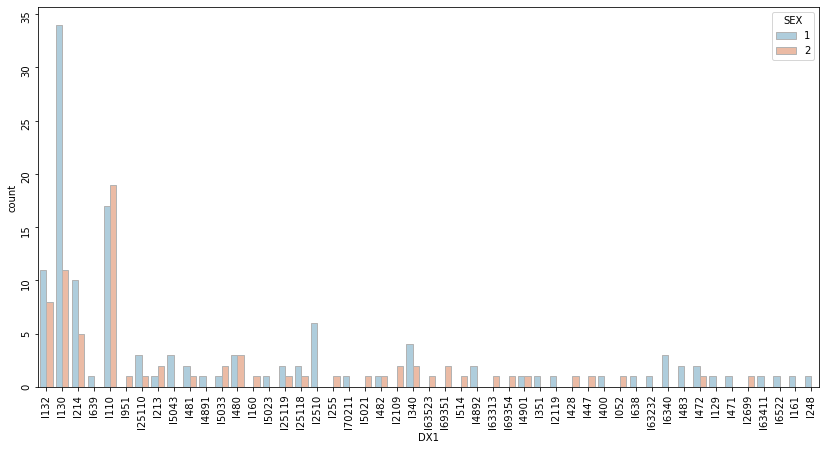

In [18]:
# DX1 
plt.figure(figsize=(14, 7))

sns.countplot(x=dx1['DX1'][:200], hue='SEX', edgecolor=".7", palette='RdBu_r', data=df)
plt.tick_params(labelrotation=90)
plt.legend(loc='upper right', title='SEX')

#### Heart disease code in DX2

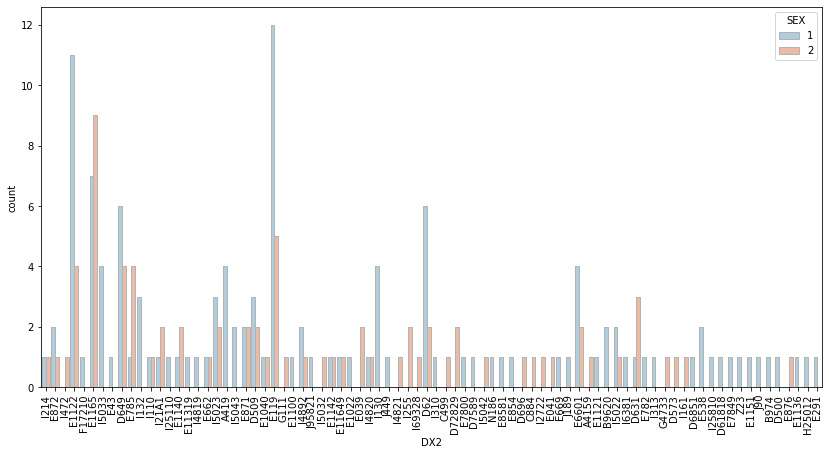

In [19]:
# DX1 
plt.figure(figsize=(14, 7))

sns.countplot(x=dx1['DX2'][:200], hue='SEX', edgecolor=".7", palette='RdBu_r', data=df)
plt.xticks(rotation=90)
plt.legend(loc='upper right', title='SEX')


#### All the disease code in DX4-DX15

In [20]:
col = [x for x in df.columns if x.startswith('DX')]

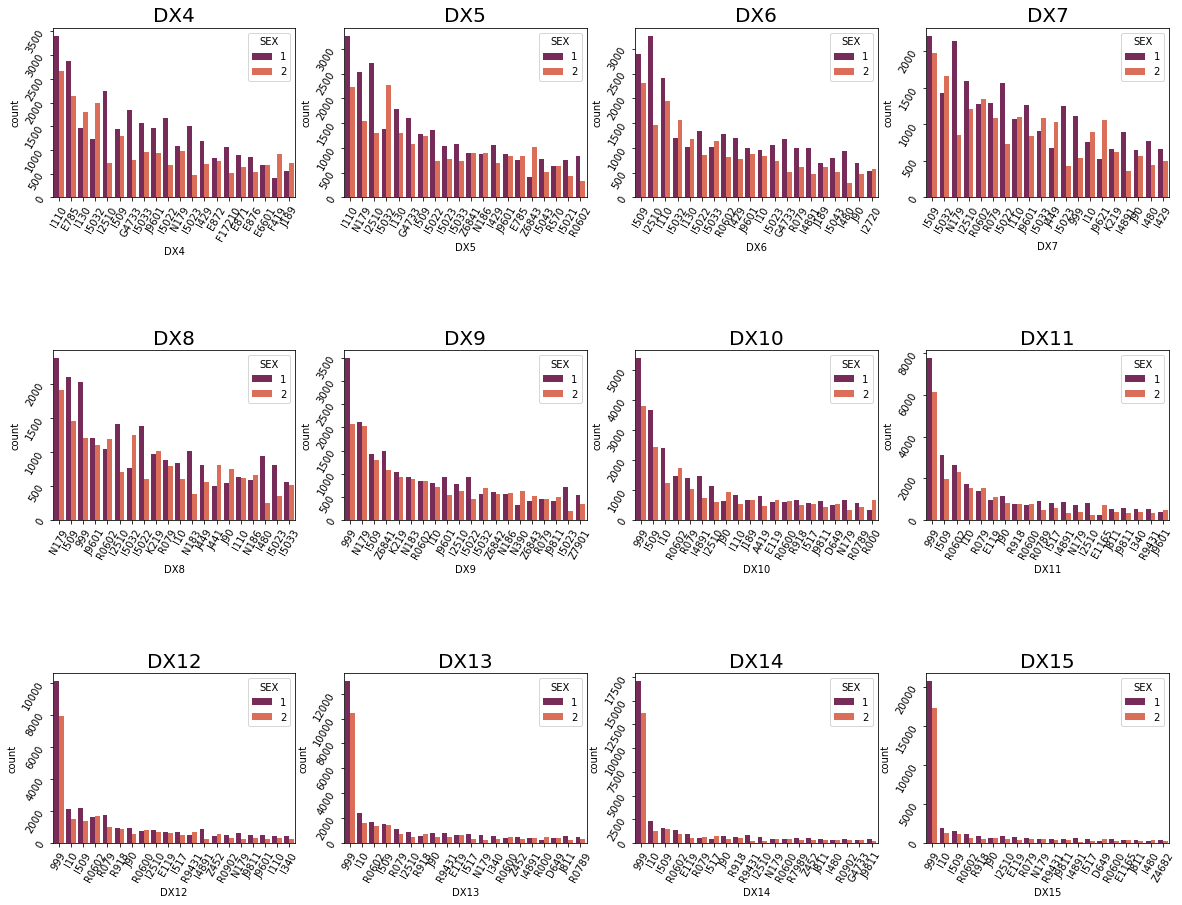

In [21]:

fig, ax = plt.subplots(3, 4, figsize=(20, 15))
ax = ax.ravel()
position = 0

for i in col[3:15]:
    order = df[i].value_counts().iloc[:20].index
    sns.countplot(x=i, ax=ax[position], hue='SEX', palette='rocket', order=order, data=df)
    ax[position].tick_params(labelrotation=60)

    ax[position].set_title(i, fontdict={'fontsize': 20})
    position += 1
    
plt.subplots_adjust(hspace=0.9)
plt.show()

### Top 20 Most Used Heart Disease Drug

<AxesSubplot:xlabel='count', ylabel='PRODNME'>

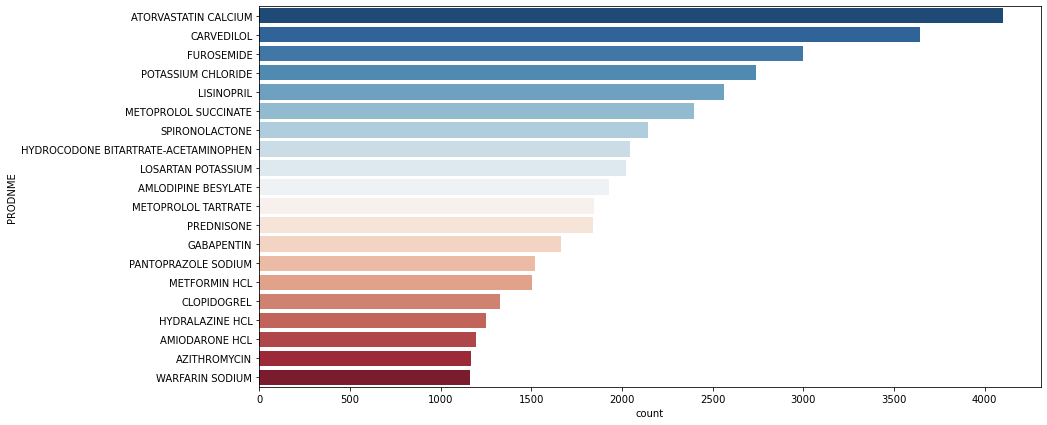

In [22]:
plt.figure(figsize=(14, 7))
sns.countplot(y=df['PRODNME'], order=df.PRODNME.value_counts().iloc[:20].index, 
              palette = 'RdBu_r', data=df)

### Top 20 Most Hospital Visited Patients

<AxesSubplot:xlabel='count', ylabel='ENROLID'>

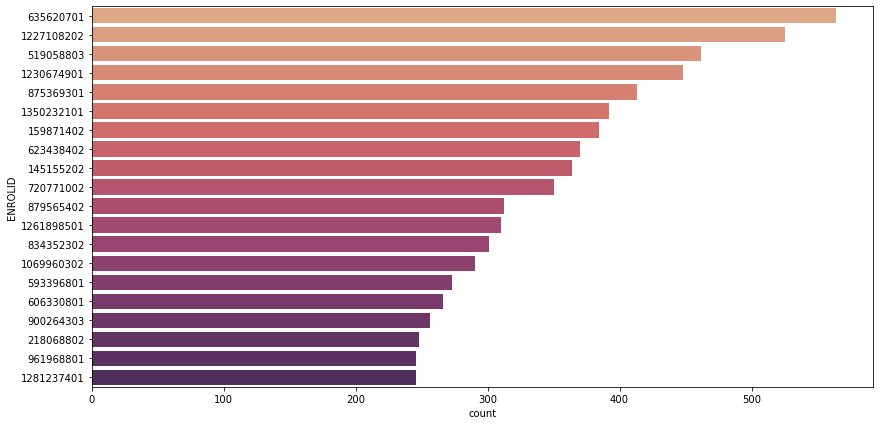

In [23]:
plt.figure(figsize=(14, 7))
sns.countplot(y=df['ENROLID'], order=df.ENROLID.value_counts().iloc[:20].index, 
              palette = 'flare', data=df)

### Age Distribution

<AxesSubplot:xlabel='AGE', ylabel='Count'>

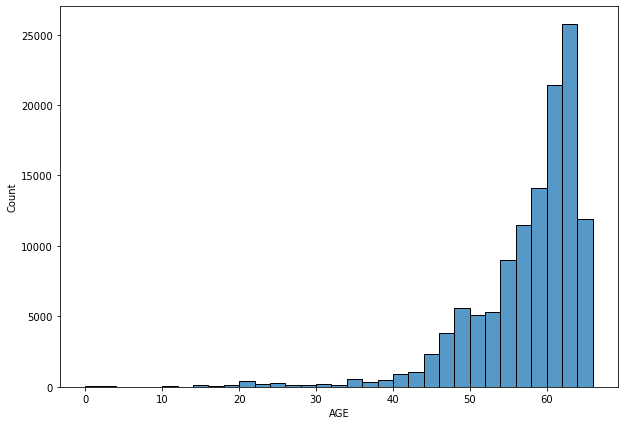

In [24]:
plt.figure(figsize=(10, 7))
sns.histplot(df['AGE'],binwidth=2)

### Density of Age vs Sex

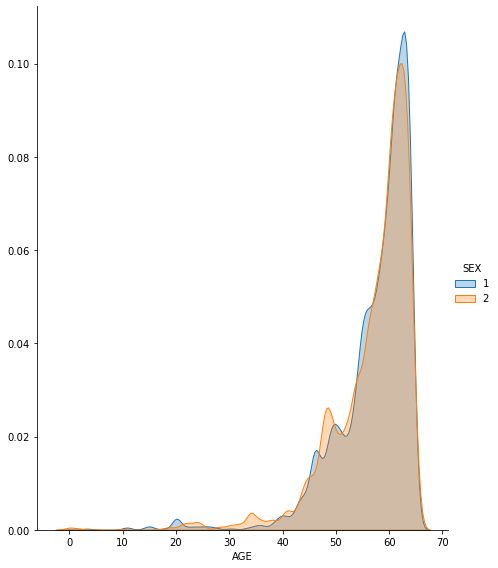

In [25]:
g = sns.FacetGrid(df, hue='SEX', size = 8, height = 4, aspect=0.8)
g = g.map(sns.kdeplot, 'AGE', shade=True, alpha=0.3)
g.add_legend()

## Data Cleansing

### Replace Diagnosis Code Start with I to '999' (Heart Disease code start with I )

In [ ]:
df[col].apply(lambda x: '999' x.startswith(i) )

In [41]:
df.loc[df['DX2'].str.startswith('I'), 'DX2'] = '99999'
df.loc[df['DX3'].str.startswith('I'), 'DX3'] = '99999'
df.loc[df['DX4'].str.startswith('I'), 'DX4'] = '99999'
df.loc[df['DX5'].str.startswith('I'), 'DX5'] = '99999'
df.loc[df['DX6'].str.startswith('I'), 'DX6'] = '99999'
df.loc[df['DX7'].str.startswith('I'), 'DX7'] = '99999'
df.loc[df['DX8'].str.startswith('I'), 'DX8'] = '99999'
df.loc[df['DX9'].str.startswith('I'), 'DX9'] = '99999'
df.loc[df['DX10'].str.startswith('I'), 'DX10'] = '99999'
df.loc[df['DX11'].str.startswith('I'), 'DX11'] = '99999'
df.loc[df['DX12'].str.startswith('I'), 'DX12'] = '99999'
df.loc[df['DX13'].str.startswith('I'), 'DX13'] = '99999'
df.loc[df['DX14'].str.startswith('I'), 'DX14'] = '99999'
df.loc[df['DX15'].str.startswith('I'), 'DX15'] = '99999'

#### Making a vector

- If DX1 - DX15 have diagnosis codes start with [A, B, C, D...]
- Then create a vector A, B, C, D as non heart disease factor

In [231]:
# There should be a smarter way, I did manually

# df['I_1'] = df['DX1'].apply(lambda x: 9999 if x =='999' else 0)
# df['I_2'] = df['DX2'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_3'] = df['DX3'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_4'] = df['DX4'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_5'] = df['DX5'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_6'] = df['DX6'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_7'] = df['DX7'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_8'] = df['DX8'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_9'] = df['DX9'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_10'] = df['DX10'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_11'] = df['DX11'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_12'] = df['DX12'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_13'] = df['DX13'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_14'] = df['DX14'].apply(lambda x: 9999 if x == '999' else 0)
# df['I_15'] = df['DX15'].apply(lambda x: 9999 if x == '999' else 0)


In [232]:
# df['I'] = (df['I_1'] + df['I_2'] + df['I_3'] + df['I_4'] + df['I_5'] +
#                  df['I_6'] + df['I_7'] + df['I_8'] + df['I_9'] + df['I_10'] + 
#                  df['I_11'] + df['I_12'] + df['I_13'] + df['I_14'] + df['I_15'])

In [233]:
df.head()

,ENROLID,DOBYR,YEAR,AGE,PDX,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX,NDCNUM,PRODNME,A,B,C,D,E,F,G,H,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,I,I_1,I_2,I_3,I_4,I_5,I_6,I_7,I_8,I_9,I_10,I_11,I_12,I_13,I_14,I_15
1604,132687801,1958,2019,61,I132,999,999,999,J9601,Z6841,N185,L97421,L97529,J810,999,E1122,999,E11621,999,E872,1,169750111,NOVOLOG,0,0,0,0,3,0,0,0,2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,59994,9999,9999,9999,0,0,0,0,0,0,9999,0,9999,0,9999,0
1605,132687801,1958,2019,61,I130,999,E872,999,999,N184,999,999,E1165,D631,E1122,N185,999,999,999,999,1,169750111,NOVOLOG,0,0,0,1,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,89991,9999,0,9999,9999,0,9999,9999,0,0,0,0,9999,9999,9999,9999
1607,133117002,1963,2019,56,J9601,J9601,E875,999,999,N186,999,R079,R918,E1122,R739,E1165,D631,E876,E8339,E8779,2,169750111,NOVOLOG,0,0,0,1,6,0,0,0,1,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,29997,0,0,9999,9999,0,9999,0,0,0,0,0,0,0,0,0
1608,133117002,1963,2019,56,A419,A419,A0472,999,999,N186,999,R079,R1084,R109,R112,999,R1011,Z136,E0842,E782,2,169750111,NOVOLOG,3,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0,0,0,1,39996,0,0,9999,9999,0,9999,0,0,0,0,9999,0,0,0,0
1609,133276802,1959,2019,59,K5732,K5732,999,999,999,J449,999,999,999,999,999,999,999,999,999,999,1,169750111,NOVOLOG,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129987,0,9999,9999,9999,0,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999


In [234]:
# drop all the temp columns

# # only can drop 3 columns at a time, otherwise will crash the program
# cols = [x for x in df.columns if x.startswith('I_')]

# df.drop(cols, axis=1, inplace=True)

In [235]:
df['I'] = df['I'].apply(lambda x: 1 if x > 59994 else 0)

In [236]:
df.head()

,ENROLID,DOBYR,YEAR,AGE,PDX,DX1,DX2,DX3,DX4,DX5,DX6,DX7,DX8,DX9,DX10,DX11,DX12,DX13,DX14,DX15,SEX,NDCNUM,PRODNME,A,B,C,D,E,F,G,H,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,I
1604,132687801,1958,2019,61,I132,999,999,999,J9601,Z6841,N185,L97421,L97529,J810,999,E1122,999,E11621,999,E872,1,169750111,NOVOLOG,0,0,0,0,3,0,0,0,2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1605,132687801,1958,2019,61,I130,999,E872,999,999,N184,999,999,E1165,D631,E1122,N185,999,999,999,999,1,169750111,NOVOLOG,0,0,0,1,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
1607,133117002,1963,2019,56,J9601,J9601,E875,999,999,N186,999,R079,R918,E1122,R739,E1165,D631,E876,E8339,E8779,2,169750111,NOVOLOG,0,0,0,1,6,0,0,0,1,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0
1608,133117002,1963,2019,56,A419,A419,A0472,999,999,N186,999,R079,R1084,R109,R112,999,R1011,Z136,E0842,E782,2,169750111,NOVOLOG,3,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0,0,0,1,0
1609,133276802,1959,2019,59,K5732,K5732,999,999,999,J449,999,999,999,999,999,999,999,999,999,999,1,169750111,NOVOLOG,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Save cleaned dataset to csv

In [240]:
df.to_csv('2019_cleaned_data.csv')

In [ ]:
#### Plot Patient who diagnosis with A (Infectious and Parasitic Diseases)

In [247]:
grouped_a = df.groupby('ENROLID')['A'].value_counts()
grouped_b = df.groupby('ENROLID')['B'].value_counts()
grouped_c = df.groupby('ENROLID')['C'].value_counts()
grouped_d = df.groupby('ENROLID')['D'].value_counts()
grouped_e = df.groupby('ENROLID')['E'].value_counts()
grouped_f = df.groupby('ENROLID')['F'].value_counts()
grouped_g = df.groupby('ENROLID')['G'].value_counts()
grouped_h = df.groupby('ENROLID')['H'].value_counts()
grouped_J = df.groupby('ENROLID')['J'].value_counts()

grouped_code = [grouped_a, grouped_b, grouped_c, grouped_d,grouped_e,
               grouped_f, grouped_g,grouped_h, grouped_J]


### Patient who diagnosis with Infectious and Parasitic Diseases

Text(0.5, 1.0, 'Infectious and Parasitic Diseases')

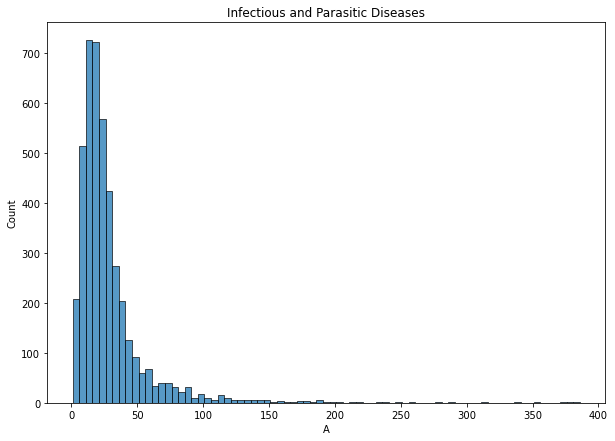

In [246]:
plt.figure(figsize = (10, 7))
ax = sns.histplot(x=grouped_a, binwidth=5, data=df)
ax.set_title('Infectious and Parasitic Diseases')

### Patient who diagnosis with different diseases

In [332]:
columns=['B', 'C', 'D', 'E', 'F', 'G', 'H', 'J']
col_names = ['Infectious and Parasitic Diseases', 'Infectious and Parasitic Diseases', 'Neoplasms',
            'Neoplasms', 'Endocrine,Nutritional, Metabolic', 'Mental and Behavioral Disorders',
            'Nervous System', 'Eye and Adnexa, Ear and Mastoid Process', 'Respiratory System']
cat_colors = ['rocket', 'viridis', 'Set2', 'Blues_r', 'Oranges_r', 'autumn_r', 'icefire_r', 'summer','icefire_r']

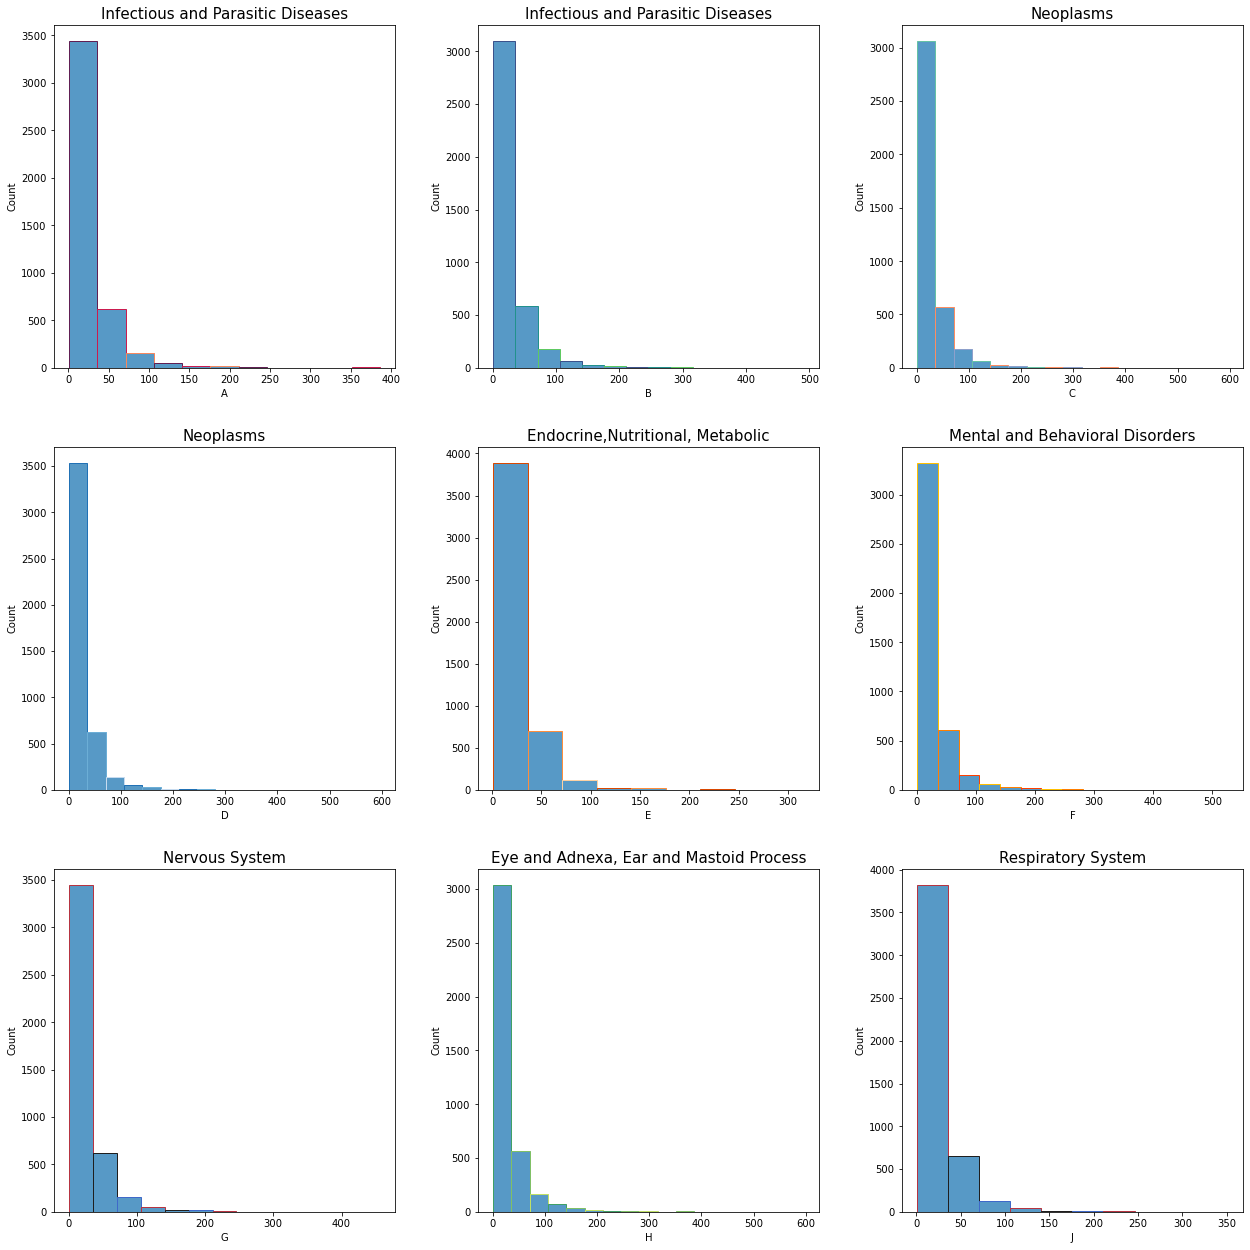

In [352]:
fig, axes = plt.subplots(3,3, figsize=(18,18))
position = 0

for row in range(3):
    for col in range(3):
        
        axes[row, col].set_title(col_names[position],fontdict={'fontsize': 15})
        
        sns.histplot(x=grouped_code[position],
                     palette = cat_colors[position],
                     edgecolor = sns.color_palette(cat_colors[position], 3),
                     binwidth = 35, 
                     ax = axes[row,col],
                    data=df)
        
        position+= 1
        

plt.tight_layout(pad=3);

### Age vs Disease code

Text(0.5, 1.0, 'Circulatory System vs Age')

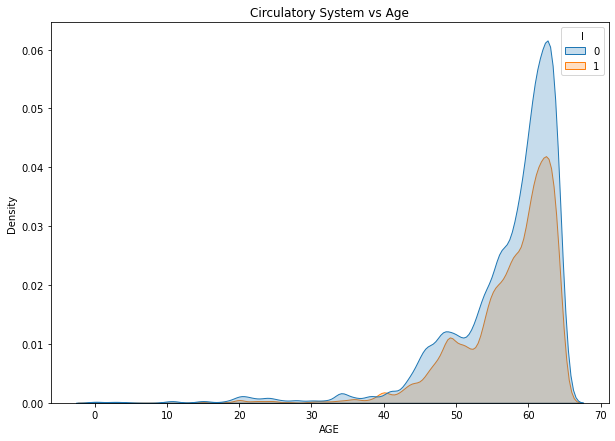

In [367]:

plt.figure(figsize = (10, 7))
ax = sns.kdeplot(x = 'AGE', hue='I', fill=True, data=df)
ax.set_title('Circulatory System vs Age')

### Symptoms, Signs and Abnormal Clinical and Lab Findings (R) Vs. Heart Disease (I)

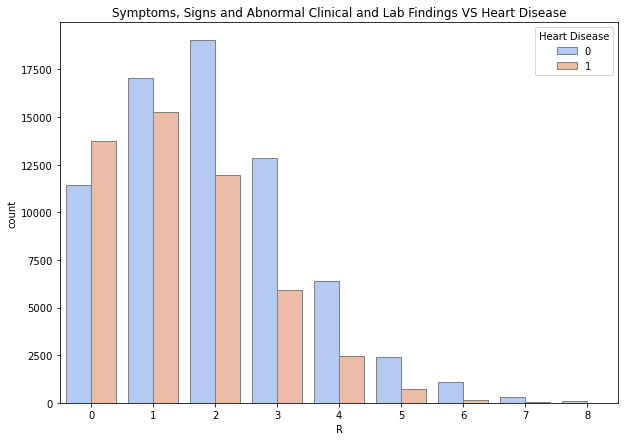

In [406]:
plt.figure(figsize = (10, 7))
ax = sns.countplot(x = 'R', hue='I', fill=True, palette='coolwarm',edgecolor=".5", data=df)
ax.set_title('Symptoms, Signs and Abnormal Clinical and Lab Findings VS Heart Disease')
plt.legend(loc='upper right', title='Heart Disease')

### Patients vs. Heart Disease

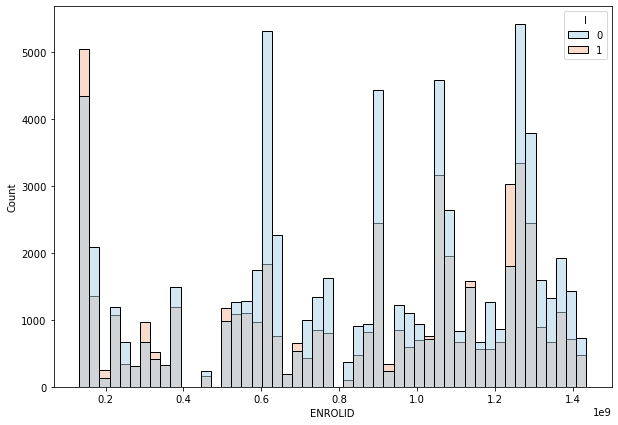

In [415]:
plt.figure(figsize = (10, 7))
sns.histplot(x = df.ENROLID, hue='I', palette = 'RdBu_r', data=df)
ax.set_title('Patients(ENROLID) VS Heart Disease')
ax.legend(loc='upper right', title='Heart Disease')

### Percentage of Male and Female

In [219]:
countFemale = len(df[df.SEX == 2])
countMale = len(df[df.SEX == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.SEX))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.SEX))*100)))

Percentage of Female Patients: 44.79%
Percentage of Male Patients: 55.21%


### Percentage of Heart Disease

In [238]:
countNoDisease = len(df[df.I == 0])
countHaveDisease = len(df[df.I == 1 ])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.I))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.I))*100)))

Percentage of Patients Haven't Heart Disease: 58.41%
Percentage of Patients Have Heart Disease: 41.59%


### Gender with Heart disease

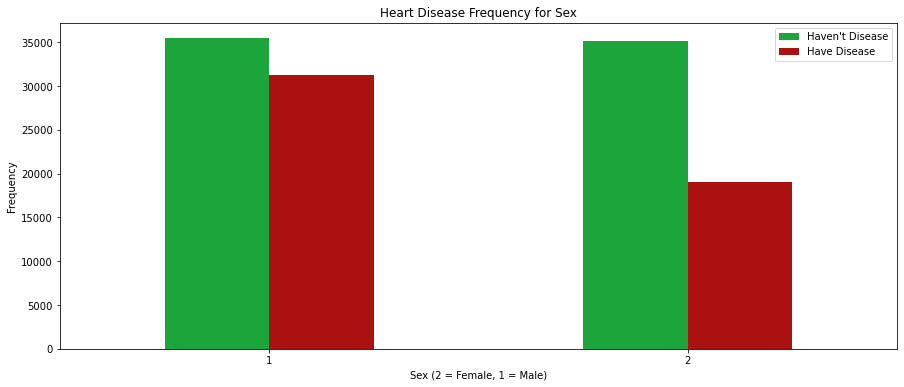

In [239]:
pd.crosstab(df.SEX,df.I).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (2 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

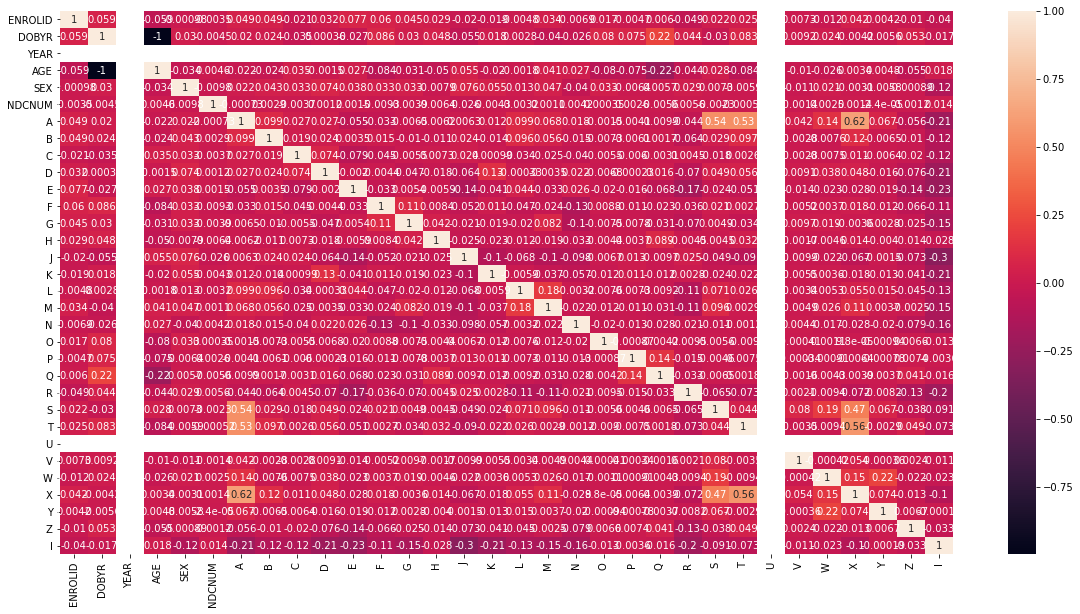

In [394]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

### Explore Machine Learning

In [418]:
import h2o
from h2o.estimators import H2ORandomForestEstimator

In [419]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "15.0.1" 2020-10-20; Java(TM) SE Runtime Environment (build 15.0.1+9-18); Java HotSpot(TM) 64-Bit Server VM (build 15.0.1+9-18, mixed mode, sharing)
  Starting server from /Applications/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/43/jqc32p4j29d9_86y_kyrfxg80000gn/T/tmpqgalut_g
  JVM stdout: /var/folders/43/jqc32p4j29d9_86y_kyrfxg80000gn/T/tmpqgalut_g/h2o_haixiaolu_started_from_python.out
  JVM stderr: /var/folders/43/jqc32p4j29d9_86y_kyrfxg80000gn/T/tmpqgalut_g/h2o_haixiaolu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month and 4 days
H2O_cluster_name:,H2O_from_python_haixiaolu_atkfyh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,6
H2O_cluster_allowed_cores:,6
H2O_cluster_status:,"locked, healthy"


In [ ]:
data = h2o.import_file('2019_cleaned_data.csv' )

In [448]:
train_columns = ['ENROLID', 'DOBYR', 'YEAR', 'AGE', 'PDX', 'DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6', 'DX7',
         'DX8', 'DX9', 'DX10', 'DX11', 'DX12', 'DX13', 'DX14', 'DX15', 'SEX', 'NDCNUM', 'PRODNME',
        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 
        'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
data['I'] = data['I'].asfactor()
response_column = 'I'

In [449]:
# Split data into train and testing
train, test = data.split_frame(ratios=[0.8])

In [453]:
# Define model
model = H2ORandomForestEstimator(ntrees=50, 
                                 max_depth=20,
                                 nfolds=10,
                                calibrate_model = True,
                                calibration_frame=test,
                                binomial_double_trees=True)

# Train model
model.train(x=train_columns, y=response_column, training_frame=train)

# Eval Performance
perf = model.model_performance()

# Generate predictions on a validation set (if necessary):
pred = model.predict(test)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Random Forest (RF) is a powerful classification tool. When given a set of data, RF generates a forest of classification trees, rather than a single classification tree. Each of these trees generates a classification for a given set of attributes. The classification from each H2O tree can be thought of as a vote; the most votes determines the classification.

In [457]:
perf


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 5.579036885861426e-05
RMSE: 0.007469295071063551
LogLoss: 0.00047469961941879423
Mean Per-Class Error: 8.841107614010468e-06
AUC: 0.9999999973659088
AUCPR: 0.9999999963012193
Gini: 0.9999999947318177

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3478260869565218: 


,,0,1,Error,Rate
0,0,56553.0,1.0,0.0,(1.0/56554.0)
1,1,0.0,40277.0,0.0,(0.0/40277.0)
2,Total,56553.0,40278.0,0.0,(1.0/96831.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.347826,0.999988,191.0
1,max f2,0.347826,0.999995,191.0
2,max f0point5,0.347826,0.999980,191.0
3,max accuracy,0.347826,0.999990,191.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.347826,1.000000,191.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.347826,0.999979,191.0
8,max min_per_class_accuracy,0.347826,0.999982,191.0
9,max mean_per_class_accuracy,0.347826,0.999991,191.0



Gains/Lift Table: Avg response rate: 41.60 %, avg score: 41.59 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.411438,1.0,2.404126,2.404126,1.000000,1.000000,1.000000,1.000000,0.98915,0.98915,140.412642,140.412642,0.98915
1,2,1.000000,0.0,0.018435,1.000000,0.007668,0.007612,0.415952,0.415919,0.01085,1.00000,-98.156545,0.000000,0.00000


In [458]:
pred

predict,p0,p1,cal_p0,cal_p1
1,0,1,6.00187e-13,1
1,0,1,6.00187e-13,1
1,0,1,6.00187e-13,1
1,0,1,6.00187e-13,1
0,1,0,0.999986,1.36984e-05
1,0,1,6.00187e-13,1
1,0,1,6.00187e-13,1
0,1,0,0.999986,1.36984e-05
0,1,0,0.999986,1.36984e-05
0,1,0,0.999986,1.36984e-05
